In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Attribute Selection for Individual Plans from PlanAttributes.csv

In [14]:
df = pd.read_csv('PlanAttributes.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77353 entries, 0 to 77352
Columns: 176 entries, AVCalculatorOutputNumber to WellnessProgramOffered
dtypes: float64(7), int64(9), object(160)
memory usage: 103.9+ MB


In [15]:
for column in df.columns:
    print ('{0:8} {1:8} {2:6} {3!s:8} {4:10}'.format(df[column].isnull().sum(), 
            df[column].notnull().sum(),
            round(df[column].notnull().sum()/df[column].notnull().count(),3), 
            df[column].dtype, column))

   22825    54528  0.705 object   AVCalculatorOutputNumber
       0    77353    1.0 int64    BeginPrimaryCareCostSharingAfterNumberOfVisits
       0    77353    1.0 int64    BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays
       0    77353    1.0 int64    BenefitPackageId
       0    77353    1.0 int64    BusinessYear
       0    77353    1.0 object   CSRVariationType
       0    77353    1.0 object   ChildOnlyOffering
   76916      437  0.006 object   ChildOnlyPlanId
   49972    27381  0.354 object   CompositeRatingOffered
   76425      928  0.012 object   DEHBCombInnOonFamilyMOOP
   77130      223  0.003 object   DEHBCombInnOonFamilyPerGroupMOOP
   77130      223  0.003 object   DEHBCombInnOonFamilyPerPersonMOOP
   76202     1151  0.015 object   DEHBCombInnOonIndividualMOOP
   58680    18673  0.241 object   DEHBDedCombInnOonFamily
   67927     9426  0.122 object   DEHBDedCombInnOonFamilyPerGroup
   67927     9426  0.122 object   DEHBDedCombInnOonFamilyPerPerson
   49254    2

In [16]:
essentials = ['AVCalculatorOutputNumber','BeginPrimaryCareCostSharingAfterNumberOfVisits',
              'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays','BusinessYear',
              'ChildOnlyOffering','CompositeRatingOffered','DentalOnlyPlan',
              'EHBPediatricDentalApportionmentQuantity',
              'EHBPercentPremiumS4','EHBPercentTotalPremium','FirstTierUtilization',
              'HSAOrHRAEmployerContribution','HSAOrHRAEmployerContributionAmount',
              'InpatientCopaymentMaximumDays','IsGuaranteedRate','IsHSAEligible',
              'IsNewPlan','IsNoticeRequiredForPregnancy','IsReferralRequiredForSpecialist',
              'IssuerActuarialValue',
              'MarketCoverage','MedicalDrugDeductiblesIntegrated',
              'MedicalDrugMaximumOutofPocketIntegrated',
              'MetalLevel','MultipleInNetworkTiers','NationalNetwork',
              'OutOfCountryCoverage','OutOfServiceAreaCoverage',
              'PlanMarketingName','PlanType','QHPNonQHPTypeId',
              'SecondTierUtilization','StandardComponentId',
              'UniquePlanDesign','WellnessProgramOffered']

In [17]:
coinsurance = []
for column in df.columns:
    if ('Coinsurance' in column and 'Begin' not in column):
        print (column, (df[column].notnull().sum()/df[column].notnull().count()))
        coinsurance.append(column)

DEHBDedInnTier1Coinsurance 0.36325675798
DEHBDedInnTier2Coinsurance 0.0356935089783
MEHBDedInnTier1Coinsurance 0.36325675798
MEHBDedInnTier2Coinsurance 0.0356935089783
SBCHavingDiabetesCoinsurance 0.491241451527
SBCHavingaBabyCoinsurance 0.491629283932
SpecialtyDrugMaximumCoinsurance 0.104585471798
TEHBDedInnTier1Coinsurance 0.486147919279
TEHBDedInnTier2Coinsurance 0.0687239021111


In [18]:
individual = []
for column in df.columns:
    if ('Individual' in column) and ((df[column].notnull().sum()/df[column].notnull().count()) > 0):
        print (column, (df[column].notnull().sum()/df[column].notnull().count()))
        individual.append(column)

DEHBCombInnOonIndividualMOOP 0.0148798365933
DEHBDedCombInnOonIndividual 0.36325675798
DEHBDedInnTier1Individual 0.36325675798
DEHBDedInnTier2Individual 0.0356935089783
DEHBDedOutOfNetIndividual 0.36325675798
DEHBInnTier1IndividualMOOP 0.0148798365933
DEHBOutOfNetIndividualMOOP 0.0148798365933
MEHBCombInnOonIndividualMOOP 0.165475159334
MEHBDedCombInnOonIndividual 0.513852080721
MEHBDedInnTier1Individual 0.513852080721
MEHBDedInnTier2Individual 0.0423771540858
MEHBDedOutOfNetIndividual 0.513852080721
MEHBInnTier1IndividualMOOP 0.165475159334
MEHBInnTier2IndividualMOOP 0.00668364510749
MEHBOutOfNetIndividualMOOP 0.165475159334
TEHBCombInnOonIndividualMOOP 0.834524840666
TEHBDedCombInnOonIndividual 0.486044497305
TEHBDedInnTier1Individual 0.486147919279
TEHBDedInnTier2Individual 0.0687239021111
TEHBDedOutOfNetIndividual 0.486147919279
TEHBInnTier1IndividualMOOP 0.834524840666
TEHBInnTier2IndividualMOOP 0.104417411089
TEHBOutOfNetIndividualMOOP 0.834524840666


In [19]:
family = []
for column in df.columns:
    if ('Family' in column) and ((df[column].notnull().sum()/df[column].notnull().count()) > 0):
        print (column, (df[column].notnull().sum()/df[column].notnull().count()))
        family.append(column)

DEHBCombInnOonFamilyMOOP 0.0119969490517
DEHBCombInnOonFamilyPerGroupMOOP 0.00288288754153
DEHBCombInnOonFamilyPerPersonMOOP 0.00288288754153
DEHBDedCombInnOonFamily 0.241399816426
DEHBDedCombInnOonFamilyPerGroup 0.121856941554
DEHBDedCombInnOonFamilyPerPerson 0.121856941554
DEHBDedInnTier1Family 0.241399816426
DEHBDedInnTier1FamilyPerGroup 0.121856941554
DEHBDedInnTier1FamilyPerPerson 0.121856941554
DEHBDedInnTier2Family 0.0123589259628
DEHBDedInnTier2FamilyPerGroup 0.0233345830155
DEHBDedInnTier2FamilyPerPerson 0.0233345830155
DEHBDedOutOfNetFamily 0.241399816426
DEHBDedOutOfNetFamilyPerGroup 0.121856941554
DEHBDedOutOfNetFamilyPerPerson 0.121856941554
DEHBInnTier1FamilyMOOP 0.0119969490517
DEHBInnTier1FamilyPerGroupMOOP 0.00288288754153
DEHBInnTier1FamilyPerPersonMOOP 0.00288288754153
DEHBOutOfNetFamilyMOOP 0.0119969490517
DEHBOutOfNetFamilyPerGroupMOOP 0.00288288754153
DEHBOutOfNetFamilyPerPersonMOOP 0.00288288754153
MEHBCombInnOonFamilyMOOP 0.11275580779
MEHBCombInnOonFamilyPerGro

In [20]:
SBC = []
for column in df.columns:
    if 'SBC' in column and 'Coinsurance' not in column:
        print (column,(df[column].notnull().sum()/df[column].notnull().count()))
        SBC.append(column)

SBCHavingDiabetesCopayment 0.492236888033
SBCHavingDiabetesDeductible 0.492314454514
SBCHavingDiabetesLimit 0.491370728996
SBCHavingaBabyCopayment 0.492521298463
SBCHavingaBabyDeductible 0.492469587476
SBCHavingaBabyLimit 0.491525861958


In [21]:
df = df[essentials + coinsurance + individual + family + SBC]
df.shape

(77353, 142)

In [22]:
df['key'] = df['BusinessYear'].astype(str) + df['StandardComponentId']

## Clean Columns

### Essentials

In [23]:
def AVcalc(x):
    if float(x) < 1:
        x = float(x)
    elif float(x) == 1:
        x = float(x)
    else:
        x = float(x)/float(100)
    return x

df['AVCalculatorOutputNumber'] = df.AVCalculatorOutputNumber.str.replace('%','')
df['AVCalculatorOutputNumber'] = pd.to_numeric(df.AVCalculatorOutputNumber,errors='raise')
df['AVCalculatorOutputNumber'] = df.AVCalculatorOutputNumber.apply(AVcalc)

df['ChildOnlyOffering'] = df.ChildOnlyOffering.replace(to_replace='Allows Adult and Child-only',value=1)
df['ChildOnlyOffering'] = df.ChildOnlyOffering.replace(to_replace='Allows Adult and Child-Only',value=1)
df['ChildOnlyOffering'] = df.ChildOnlyOffering.replace(to_replace='Allows Adult-Only',value=0)
df['ChildOnlyOffering'] = df.ChildOnlyOffering.replace(to_replace='Allows Child-Only',value=1)

df['CompositeRatingOffered'] = df.CompositeRatingOffered.replace(to_replace='Yes',value=1)
df['CompositeRatingOffered'] = df.CompositeRatingOffered.replace(to_replace='No',value=0)

df['DentalOnlyPlan'] = df.DentalOnlyPlan.replace(to_replace='Yes',value=1)
df['DentalOnlyPlan'] = df.DentalOnlyPlan.replace(to_replace='No',value=0)

df['EHBPediatricDentalApportionmentQuantity'] = df['EHBPediatricDentalApportionmentQuantity'].replace('[\$,)]','', regex=True).astype(float)

df['FirstTierUtilization'] = df.FirstTierUtilization.str.replace('%','')
df['FirstTierUtilization'] = pd.to_numeric(df.FirstTierUtilization,errors='raise')
df['FirstTierUtilization'] = df.FirstTierUtilization.apply(AVcalc)

df['SecondTierUtilization'] = df.SecondTierUtilization.str.replace('%','')
df['SecondTierUtilization'] = pd.to_numeric(df.SecondTierUtilization,errors='raise')
df['SecondTierUtilization'] = df.SecondTierUtilization.apply(AVcalc)

df['HSAOrHRAEmployerContribution'] = df.HSAOrHRAEmployerContribution.replace(to_replace='NO',value=0)
df['HSAOrHRAEmployerContribution'] = df.HSAOrHRAEmployerContribution.replace(to_replace='No',value=0)
df['HSAOrHRAEmployerContribution'] = df.HSAOrHRAEmployerContribution.replace(to_replace='Yes',value=1)

df['HSAOrHRAEmployerContributionAmount'] = df['HSAOrHRAEmployerContributionAmount'].replace('[\$,)]','', regex=True).astype(float)

df['IsGuaranteedRate'] = df.IsGuaranteedRate.replace(to_replace='Estimated Rate',value=0)
df['IsGuaranteedRate'] = df.IsGuaranteedRate.replace(to_replace='Guaranteed Rate',value=1)

df['IsHSAEligible'] = df.IsHSAEligible.replace(to_replace='NO',value=0)
df['IsHSAEligible'] = df.IsHSAEligible.replace(to_replace='No',value=0)
df['IsHSAEligible'] = df.IsHSAEligible.replace(to_replace='Yes',value=1)

df['IsNewPlan'] = df.IsNewPlan.replace(to_replace='Existing',value=0)
df['IsNewPlan'] = df.IsNewPlan.replace(to_replace='New',value=1)

df['IsNoticeRequiredForPregnancy'] = df.IsNoticeRequiredForPregnancy.replace(to_replace='NO',value=0)
df['IsNoticeRequiredForPregnancy'] = df.IsNoticeRequiredForPregnancy.replace(to_replace='No',value=0)
df['IsNoticeRequiredForPregnancy'] = df.IsNoticeRequiredForPregnancy.replace(to_replace='Yes',value=1)
df['IsNoticeRequiredForPregnancy'] = df.IsNoticeRequiredForPregnancy.replace(to_replace='yes',value=1)

df['IsReferralRequiredForSpecialist'] = df.IsReferralRequiredForSpecialist.replace(to_replace='No',value=0)
df['IsReferralRequiredForSpecialist'] = df.IsReferralRequiredForSpecialist.replace(to_replace='Yes',value=1)
df['IsReferralRequiredForSpecialist'] = df.IsReferralRequiredForSpecialist.replace(to_replace='yes',value=1)

df['IssuerActuarialValue'] = df.IssuerActuarialValue.str.replace('%','')
df['IssuerActuarialValue'] = pd.to_numeric(df.IssuerActuarialValue,errors='raise')
df['IssuerActuarialValue'] = df.IssuerActuarialValue.apply(AVcalc)

df['MarketCoverage'] = df.MarketCoverage.replace(to_replace='Individual',value=0)
df['MarketCoverage'] = df.MarketCoverage.replace(to_replace='SHOP (Small Group)',value=1)

df['MedicalDrugDeductiblesIntegrated'] = df.MedicalDrugDeductiblesIntegrated.replace(to_replace='No', value = 0)
df['MedicalDrugDeductiblesIntegrated'] = df.MedicalDrugDeductiblesIntegrated.replace(to_replace='Yes', value = 1)

df['MedicalDrugMaximumOutofPocketIntegrated'] = df.MedicalDrugMaximumOutofPocketIntegrated.replace(to_replace='No', value = 0)
df['MedicalDrugMaximumOutofPocketIntegrated'] = df.MedicalDrugMaximumOutofPocketIntegrated.replace(to_replace='Yes', value = 1)

df['MultipleInNetworkTiers'] = df.MultipleInNetworkTiers.replace(to_replace='No', value = 0)
df['MultipleInNetworkTiers'] = df.MultipleInNetworkTiers.replace(to_replace='Yes', value = 1)

df['NationalNetwork'] = df.NationalNetwork.replace(to_replace='NO',value=0)
df['NationalNetwork'] = df.NationalNetwork.replace(to_replace='no',value=0)
df['NationalNetwork'] = df.NationalNetwork.replace(to_replace='No',value=0)
df['NationalNetwork'] = df.NationalNetwork.replace(to_replace='YES',value=1)
df['NationalNetwork'] = df.NationalNetwork.replace(to_replace='YEs',value=1)
df['NationalNetwork'] = df.NationalNetwork.replace(to_replace='Yes',value=1)

df['OutOfCountryCoverage'] = df.OutOfCountryCoverage.replace(to_replace='No',value=0)
df['OutOfCountryCoverage'] = df.OutOfCountryCoverage.replace(to_replace='YES',value=1)
df['OutOfCountryCoverage'] = df.OutOfCountryCoverage.replace(to_replace='Yes',value=1)

df['OutOfServiceAreaCoverage'] = df.OutOfServiceAreaCoverage.replace(to_replace='No',value=0)
df['OutOfServiceAreaCoverage'] = df.OutOfServiceAreaCoverage.replace(to_replace='YES',value=1)
df['OutOfServiceAreaCoverage'] = df.OutOfServiceAreaCoverage.replace(to_replace='Yes',value=1)
df['OutOfServiceAreaCoverage'] = df.OutOfServiceAreaCoverage.replace(to_replace='yes',value=1)

df['UniquePlanDesign'] = df.UniquePlanDesign.replace(to_replace='No',value=0)
df['UniquePlanDesign'] = df.UniquePlanDesign.replace(to_replace='no',value=0)
df['UniquePlanDesign'] = df.UniquePlanDesign.replace(to_replace='Yes',value=1)

df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='yes',value=1)
df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='Yes',value=1)
df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='no',value=0)
df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='No',value=0)
df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='Guaranteed Rate',value=1)
df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='Estimated Rate',value=1)
df['WellnessProgramOffered'] = df.WellnessProgramOffered.replace(to_replace='Allows Adult and Child-Only',value=1)

### Cleaning Specific Columns

In [24]:
for col in coinsurance:
    if 'Tier' in col:
        df[col] = df[col].replace(to_replace='$0', value = '0')
        df[col] = df[col].replace(to_replace='$0 ', value = '0')
        df[col] = df[col].str.replace('%','')
        df[col] = pd.to_numeric(df[col],errors='raise')
        df[col] = df[col].apply(AVcalc)
    else:
        df[col] = df[col].replace(to_replace='Not Applicable', value = np.nan)
        df[col] = df[col].replace('[\$,)]','', regex=True).astype(float)

In [25]:
for col in individual:
    df[col] = df[col].replace(to_replace='Not Applicable', value = np.nan)
    df[col] = df[col].replace('[\$,)]','', regex=True).astype(float)

In [26]:
for col in family:
    df[col] = df[col].str.replace(' per group','')
    df[col] = df[col].str.replace(' per person','')
    df[col] = df[col].replace(to_replace='per group not applicable', value = np.nan)
    df[col] = df[col].replace(to_replace='per group Not Applicable', value = np.nan)
    df[col] = df[col].replace(to_replace='per person not applicable', value = np.nan)
    df[col] = df[col].replace(to_replace='per person Not Applicable', value = np.nan)
    df[col] = df[col].replace(to_replace='Not Applicable', value = np.nan)
    df[col] = df[col].replace('[\$,)]','', regex=True).astype(float)

In [27]:
for col in SBC:
    df[col] = df[col].replace('[\$,)]','', regex=True).astype(float)

In [28]:
for column in df.columns:
    print ('{0:8} {1:8} {2:6} {3!s:8} {4:10}'.format(df[column].isnull().sum(), df[column].notnull().sum(),
           round(df[column].notnull().sum()/df[column].notnull().count(),3), df[column].dtype, column))

   72015     5338  0.069 float64  AVCalculatorOutputNumber
       0    77353    1.0 int64    BeginPrimaryCareCostSharingAfterNumberOfVisits
       0    77353    1.0 int64    BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays
       0    77353    1.0 int64    BusinessYear
       0    77353    1.0 int64    ChildOnlyOffering
   49972    27381  0.354 float64  CompositeRatingOffered
       0    77353    1.0 int64    DentalOnlyPlan
   65704    11649  0.151 float64  EHBPediatricDentalApportionmentQuantity
   35476    41877  0.541 float64  EHBPercentPremiumS4
   54243    23110  0.299 float64  EHBPercentTotalPremium
       0    77353    1.0 float64  FirstTierUtilization
   66641    10712  0.138 float64  HSAOrHRAEmployerContribution
   77067      286  0.004 float64  HSAOrHRAEmployerContributionAmount
       0    77353    1.0 int64    InpatientCopaymentMaximumDays
   65704    11649  0.151 float64  IsGuaranteedRate
   11649    65704  0.849 float64  IsHSAEligible
       0    77353    1.0 int6

In [29]:
df_attr = df
print (df_attr.key.unique().shape)
print (df_attr.shape)

(25614,)
(77353, 143)


# Prepare Rate.csv for Join with Plan Attributes

In [30]:
df = pd.read_csv('Rate.csv')

In [31]:
ordered_cols = ['BusinessYear','StateCode','IssuerId','PlanId','RatingAreaId','Tobacco','Age',
                'IndividualRate','IndividualTobaccoRate','PrimarySubscriberAndOneDependent',
                'PrimarySubscriberAndTwoDependents','PrimarySubscriberAndThreeOrMoreDependents',
                'Couple','CoupleAndOneDependent','CoupleAndTwoDependents',
                'CoupleAndThreeOrMoreDependents']

df_rate = df[ordered_cols]
df_rate = df_rate[df_rate['BusinessYear'] == 2016]
df_rate['key'] = df_rate.BusinessYear.astype(str) + df_rate.PlanId

In [32]:
print (df_rate.key.unique().shape)
print (df_rate.shape)

(8887,)
(4221965, 17)


In [33]:
df_rate['Age'] = df_rate.Age.str.replace('0-20','20')
df_rate['Age'] = df_rate.Age.str.replace('65 and over','65')
df_rate['Age'] = df_rate.Age.replace(to_replace="Family Option", value = '66')
df_rate['Age'] = df_rate.Age.astype(float)

df_rate['Tobacco'] = df_rate.Tobacco.replace(to_replace='No Preference', value = 0)
df_rate['Tobacco'] = df_rate.Tobacco.replace(to_replace='Tobacco User/Non-Tobacco User', value = 1)

In [34]:
df_rate.shape

(4221965, 17)

In [35]:
df_rate.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4221965 entries, 8472480 to 12694444
Data columns (total 17 columns):
BusinessYear                                 int64
StateCode                                    object
IssuerId                                     int64
PlanId                                       object
RatingAreaId                                 object
Tobacco                                      int64
Age                                          float64
IndividualRate                               float64
IndividualTobaccoRate                        float64
PrimarySubscriberAndOneDependent             float64
PrimarySubscriberAndTwoDependents            float64
PrimarySubscriberAndThreeOrMoreDependents    float64
Couple                                       float64
CoupleAndOneDependent                        float64
CoupleAndTwoDependents                       float64
CoupleAndThreeOrMoreDependents               float64
key                                      

In [36]:
del df

## Join Rate and Attribute Tables

In [37]:
print (df_attr.key.unique().shape)
print (df_rate.key.unique().shape)

(25614,)
(8887,)


In [38]:
df_join_RA = df_rate.merge(df_attr,how='left',on='key') #left, don't want to lose any rate keys
df_join_RA = df_join_RA.drop_duplicates()

In [39]:
if 'BusinessYear_y' in df_join_RA.columns:
    df_join_RA = df_join_RA.drop('BusinessYear_y',axis=1)
    
df_join_RA = df_join_RA.rename(columns={'BusinessYear_x':'BusinessYear'})

In [40]:
print (df_join_RA.key.unique().shape)
print (df_join_RA.shape)

(8887,)
(6213495, 158)


In [41]:
df_join_RA.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6213495 entries, 0 to 10066072
Columns: 158 entries, BusinessYear to SBCHavingaBabyLimit
dtypes: float64(135), int64(14), object(9)
memory usage: 7.4+ GB


In [312]:
#df_join_RA.to_csv('df_join_RA.csv',encoding='utf-8')

## We will now begin the modeling

In [1]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('ignore')

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
from sklearn.cross_validation import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import SGDClassifier
from sklearn.ensemble import RandomForestClassifier

labels = ['Bronze','Silver','Gold','Platinum']
def plot_confusion_matrix(cm, title='Confusion matrix', cmap=plt.cm.Blues,labels=labels):
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title, fontsize = 16)
    plt.colorbar()
    tick_marks = np.arange(len(labels))
    plt.xticks(tick_marks, labels, rotation=45, fontsize = 14)
    plt.yticks(tick_marks, labels, fontsize = 14)
    plt.tight_layout()
    plt.ylabel('True label', fontsize = 16)
    plt.xlabel('Predicted label', fontsize = 16)

In [3]:
df_join_RA = pd.read_csv('df_join_RA.csv')
df_join_RA = df_join_RA.iloc[:,1:]
df_join_RA.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6213495 entries, 0 to 6213494
Columns: 158 entries, BusinessYear to SBCHavingaBabyLimit
dtypes: float64(135), int64(14), object(9)
memory usage: 7.3+ GB


In [4]:
df = df_join_RA

### Filtering

In [5]:
#df = df[df['CompositeRatingOffered'] == 0] # No for Individual Plans = 0,
df = df[df['DentalOnlyPlan'] == 0] # Not a Dental Plan Only = 0, DentalOnlyPlan = 1
df = df[df['MarketCoverage'] == 1] # Individual = 0, Small Group = 1

In [6]:
df.shape

(1628492, 158)

In [7]:
df.groupby('MetalLevel')['key','BusinessYear'].count()

,key,BusinessYear
MetalLevel,,
Bronze,315238,315238
Gold,549976,549976
Platinum,110906,110906
Silver,652372,652372


In [8]:
df.groupby('BusinessYear')['key','BusinessYear'].count()

,key,BusinessYear
BusinessYear,,
2016,1628492,1628492


In [9]:
df.groupby('PlanType')['key','BusinessYear'].count()

,key,BusinessYear
PlanType,,
EPO,152260,152260
HMO,448408,448408
Indemnity,9936,9936
POS,226872,226872
PPO,791016,791016


In [10]:
df.groupby('QHPNonQHPTypeId')['key','BusinessYear'].count()

,key,BusinessYear
QHPNonQHPTypeId,,
Both,1618556,1618556
On the Exchange,9936,9936


In [11]:
tmp_df = pd.get_dummies(df.PlanType,prefix='PlanType')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

tmp_df = pd.get_dummies(df.QHPNonQHPTypeId,prefix='QHP')
df = pd.concat((df,tmp_df),axis=1) # add back into the dataframe

In [12]:
df = df.rename(columns = {'BeginPrimaryCareCostSharingAfterNumberOfVisits':'BeginCostSharingAfterNumberOfVisits'})
df = df.rename(columns = {'BeginPrimaryCareDeductibleCoinsuranceAfterNumberOfCopays':'BeginDedCoinsAfterNumberOfCopays'})
df = df.rename(columns = {'EHBPediatricDentalApportionmentQuantity':'PediatricDentalApportionmentQty'})
df = df.rename(columns = {'InpatientCopaymentMaximumDays':'InpatientCopayMaxDays'})

In [13]:
for column in df.columns:
    print ('{0:8} {1:8} {2:6} {3!s:10} {4:20}'.format(
            df[column].isnull().sum(), 
            df[column].notnull().sum(),
            round(df[column].notnull().sum()/df[column].notnull().count(),3),
            df[column].dtype,column))

       0  1628492    1.0 int64      BusinessYear        
       0  1628492    1.0 object     StateCode           
       0  1628492    1.0 int64      IssuerId            
       0  1628492    1.0 object     PlanId              
       0  1628492    1.0 object     RatingAreaId        
       0  1628492    1.0 int64      Tobacco             
       0  1628492    1.0 float64    Age                 
       0  1628492    1.0 float64    IndividualRate      
  968484   660008  0.405 float64    IndividualTobaccoRate
 1628492        0    0.0 float64    PrimarySubscriberAndOneDependent
 1628492        0    0.0 float64    PrimarySubscriberAndTwoDependents
 1628492        0    0.0 float64    PrimarySubscriberAndThreeOrMoreDependents
 1628492        0    0.0 float64    Couple              
 1628492        0    0.0 float64    CoupleAndOneDependent
 1628492        0    0.0 float64    CoupleAndTwoDependents
 1628492        0    0.0 float64    CoupleAndThreeOrMoreDependents
       0  1628492    1.0 obj

In [14]:
noNeed = ['BusinessYear','IssuerId','Age','IndividualTobaccoRate']
noNulls = []
for column in df.columns:
    if ((df[column].notnull().sum()/df[column].notnull().count() == 1) and (df[column].dtype != 'object')
       and (column not in noNeed)):
        print ('{0:6} {1:20}'.format(df[column].notnull().sum()/df[column].notnull().count(),column))
        noNulls.append(column)

   1.0 Tobacco             
   1.0 IndividualRate      
   1.0 BeginCostSharingAfterNumberOfVisits
   1.0 BeginDedCoinsAfterNumberOfCopays
   1.0 ChildOnlyOffering   
   1.0 CompositeRatingOffered
   1.0 DentalOnlyPlan      
   1.0 FirstTierUtilization
   1.0 HSAOrHRAEmployerContribution
   1.0 InpatientCopayMaxDays
   1.0 IsHSAEligible       
   1.0 IsNewPlan           
   1.0 IsNoticeRequiredForPregnancy
   1.0 IsReferralRequiredForSpecialist
   1.0 MarketCoverage      
   1.0 MedicalDrugDeductiblesIntegrated
   1.0 MedicalDrugMaximumOutofPocketIntegrated
   1.0 MultipleInNetworkTiers
   1.0 NationalNetwork     
   1.0 OutOfCountryCoverage
   1.0 OutOfServiceAreaCoverage
   1.0 UniquePlanDesign    
   1.0 WellnessProgramOffered
   1.0 SBCHavingDiabetesCoinsurance
   1.0 SBCHavingaBabyCoinsurance
   1.0 SBCHavingDiabetesCopayment
   1.0 SBCHavingDiabetesDeductible
   1.0 SBCHavingDiabetesLimit
   1.0 SBCHavingaBabyCopayment
   1.0 SBCHavingaBabyDeductible
   1.0 SBCHavingaBabyLimit 
 

In [15]:
imputed = []
for column in df.columns:
    if ((column not in noNulls) and (df[column].dtype != 'object') and (column not in noNeed)
       and ( df[column].notnull().sum()/df[column].notnull().count() > 0.6 )):
        print ('{0:6} {1:20}'.format(round(df[column].notnull().sum()/df[column].notnull().count(),4),column))
        imputed.append(column)

0.9224 EHBPercentTotalPremium
 0.988 TEHBInnTier1IndividualMOOP
 0.988 TEHBInnTier1FamilyPerGroupMOOP
 0.988 TEHBInnTier1FamilyPerPersonMOOP


In [16]:
#df.IndividualTobaccoRate = df.IndividualTobaccoRate.fillna(df.IndividualTobaccoRate.median()) #?
df.EHBPercentTotalPremium = df.EHBPercentTotalPremium.fillna(df.EHBPercentTotalPremium.median()) #median
df.TEHBDedInnTier1Coinsurance = df.TEHBDedInnTier1Coinsurance.fillna(df.TEHBDedInnTier1Coinsurance.median()) #median
df.TEHBDedInnTier1Individual = df.TEHBDedInnTier1Individual.fillna(df.TEHBDedInnTier1Individual.median()) #median
df.TEHBInnTier1IndividualMOOP = df.TEHBInnTier1IndividualMOOP.fillna(df.TEHBInnTier1IndividualMOOP.median()) #median
df.TEHBDedInnTier1FamilyPerGroup = df.TEHBDedInnTier1FamilyPerGroup.fillna(df.TEHBDedInnTier1FamilyPerGroup.median()) #median
df.TEHBDedInnTier1FamilyPerPerson = df.TEHBDedInnTier1FamilyPerPerson.fillna(df.TEHBDedInnTier1FamilyPerPerson.median()) #median
df.TEHBInnTier1FamilyPerGroupMOOP = df.TEHBInnTier1FamilyPerGroupMOOP.fillna(df.TEHBInnTier1FamilyPerGroupMOOP.median()) #median
df.TEHBInnTier1FamilyPerPersonMOOP = df.TEHBInnTier1FamilyPerPersonMOOP.fillna(df.TEHBInnTier1FamilyPerPersonMOOP.median()) #median

### Train and Test with 2016 Data

In [17]:
colX = noNulls + imputed

In [18]:
X_train, X_test, y_train, y_test = train_test_split(df[colX], 
                                                    df['MetalLevel'], 
                                                    test_size=0.30,random_state=42)

In [19]:
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train = scl_obj.transform(X_train)
X_test = scl_obj.transform(X_test)

svm_sgd = SGDClassifier(alpha=0.0001, loss='hinge', penalty='l2',class_weight='balanced')

svm_sgd.fit(X_train,y_train)
yhat = svm_sgd.predict(X_test)

conf = confusion_matrix(y_test,yhat,labels)
acc = accuracy_score(y_test,yhat)
print (conf)
print (acc)

[[ 93666    992      0      0]
 [  6623 149869  38860      0]
 [    42  12141 152398    629]
 [     0     56   3723  29549]]
0.870911353644


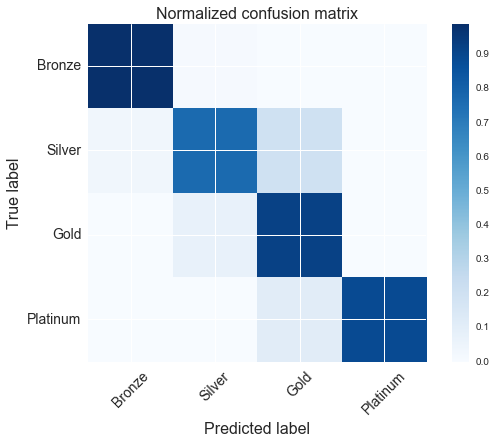

In [20]:
plt.figure(figsize=(8, 6))
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(conf_normalized, title='Normalized confusion matrix',labels=labels)

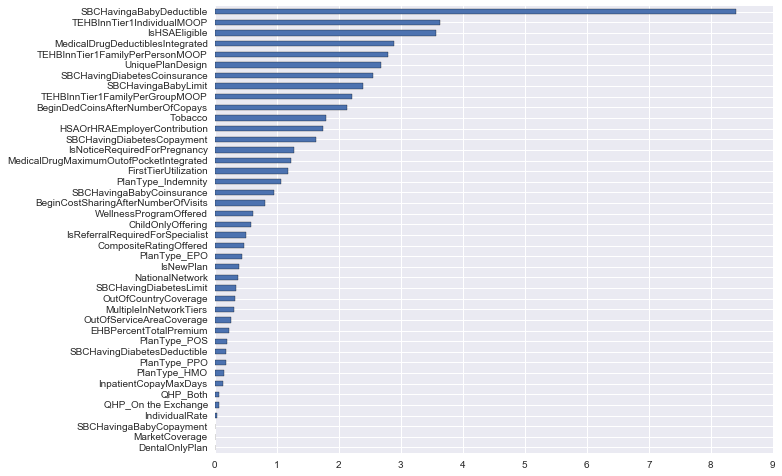

In [21]:
plt.figure(figsize=(10, 8))
#weights = pd.Series(svm_sgd.coef_[0],index=colX)
weights = pd.Series(abs(svm_sgd.coef_[0]),index=colX)
weights = weights.sort_values(ascending=True)
weights.plot(kind='barh')

## Try a different Classifier, RandomForests

### Train and Test with 2016 Data

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df[colX], 
                                                    df['MetalLevel'], 
                                                    test_size=0.30,random_state=42)

In [23]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

conf = confusion_matrix(y_test,predictions,labels)
acc = accuracy_score(y_test,predictions)

print (conf)
print (acc)

[[ 94658      0      0      0]
 [     0 195352      0      0]
 [     0      0 165210      0]
 [     0      0      0  33328]]
1.0


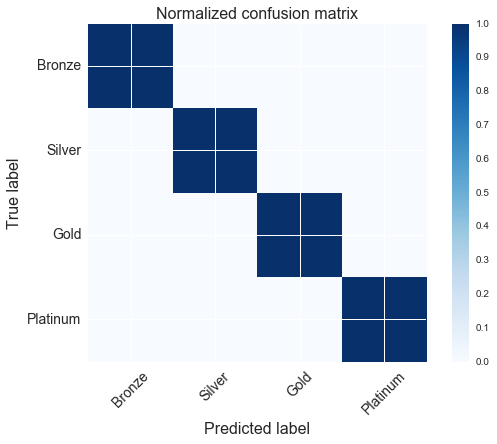

In [24]:
plt.figure(figsize=(8, 6))
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(conf_normalized, title='Normalized confusion matrix',labels=labels)

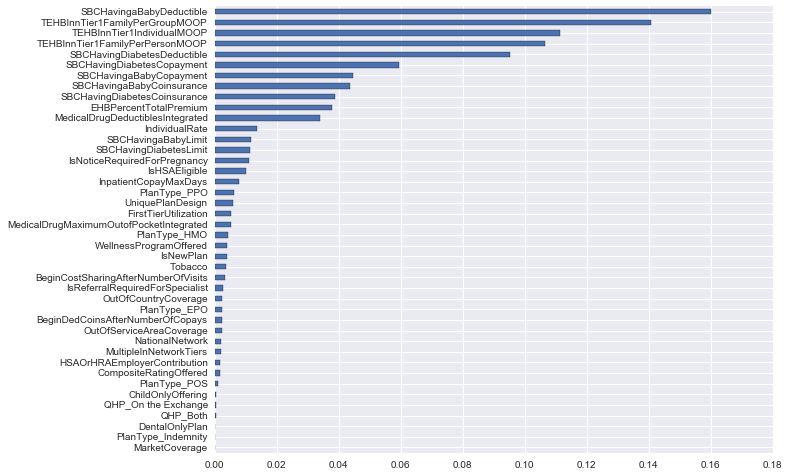

In [25]:
plt.figure(figsize=(10, 8))
weights = pd.Series(model.feature_importances_,index=colX)
weights = weights.sort_values(ascending=True)
weights.plot(kind='barh')

### Weight Comparison Plots

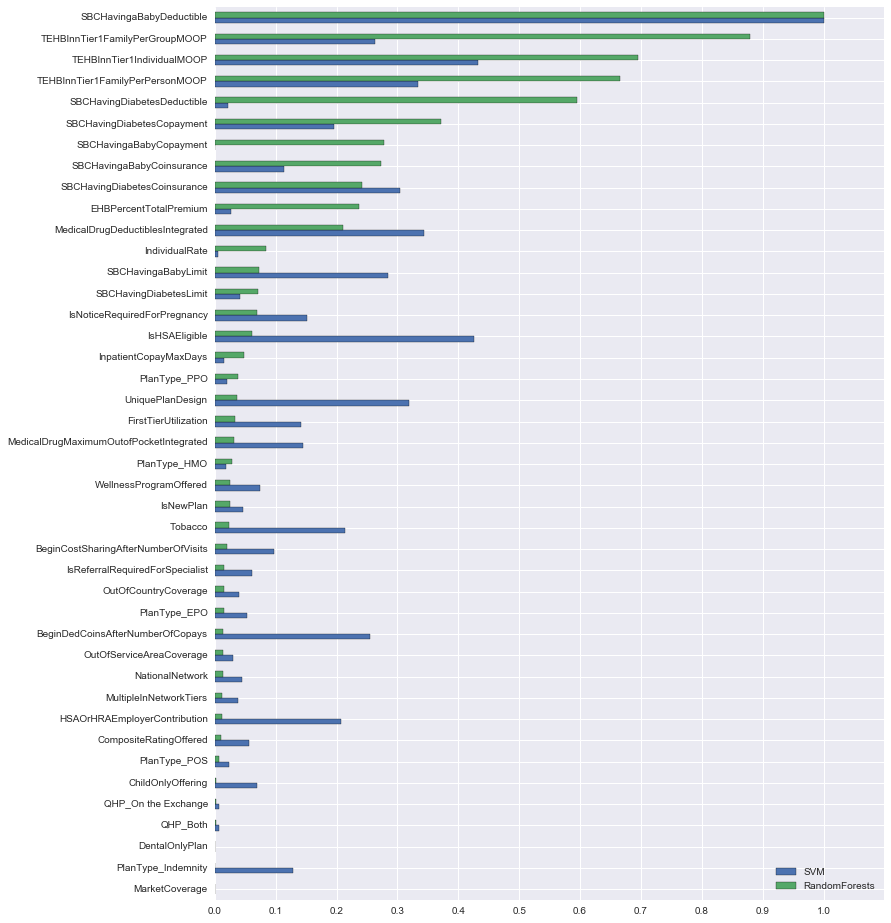

In [26]:
weightsSVM = pd.Series(abs(svm_sgd.coef_[0]),index=colX)
weightsRF = pd.Series(model.feature_importances_,index=colX)

inf = pd.concat([weightsSVM,weightsRF],axis=1)
inf = inf.rename(columns={0:'SVM',1:'RandomForests'})

inf['SVM'] = inf.SVM/inf.SVM.max()
inf['RandomForests'] = inf.RandomForests/inf.RandomForests.max()

inf.sort_values('RandomForests', ascending=True).plot(kind='barh',stacked=False,figsize=(12,16))
plt.xlim([0,1.1])
plt.xticks(np.arange(0, 1.05, .1))

# inf.sort_values('RandomForests', ascending=False).plot(kind='bar',stacked=False,figsize=(16,10))
# plt.ylim([0,1.05])

#Attributes to keep
attributesKeep = inf.loc[inf['RandomForests'] > 0.1,:].index.values

### Train and Test but let's Eliminate Variables

In [27]:
colX = attributesKeep

In [28]:
X_train, X_test, y_train, y_test = train_test_split(df[colX], 
                                                    df['MetalLevel'], 
                                                    test_size=0.30,random_state=42)

In [29]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

conf = confusion_matrix(y_test,predictions,labels)
acc = accuracy_score(y_test,predictions)

print (conf)
print (acc)

[[ 94658      0      0      0]
 [   350 195002      0      0]
 [     0      0 165210      0]
 [     0      0      0  33328]]
0.999283591377


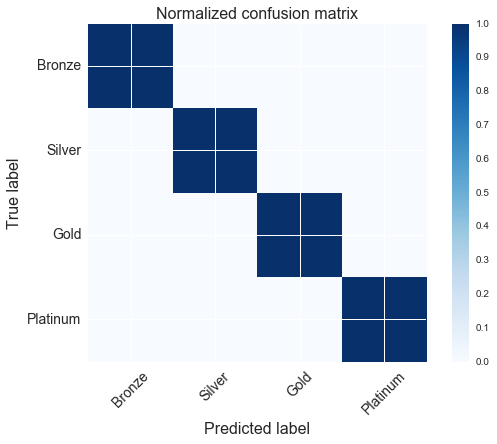

In [30]:
plt.figure(figsize=(8, 6))
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(conf_normalized, title='Normalized confusion matrix',labels=labels)

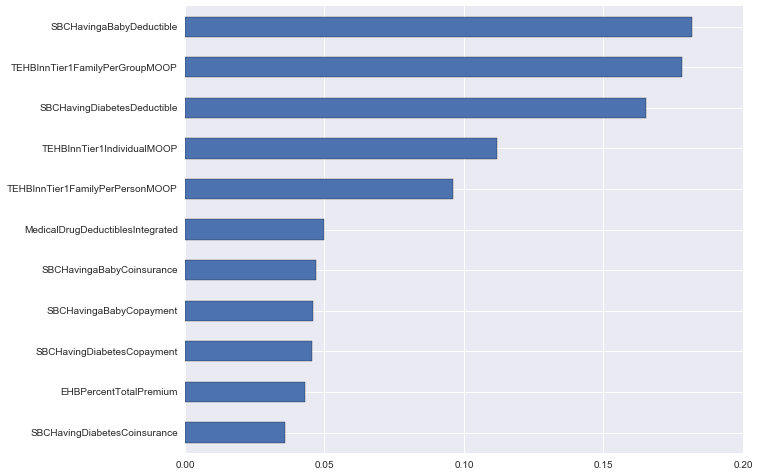

In [31]:
plt.figure(figsize=(10, 8))
weights = pd.Series(model.feature_importances_,index=colX)
weights = weights.sort_values(ascending=True)
weights.plot(kind='barh')

### Now try with SVM

In [32]:
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train = scl_obj.transform(X_train)
X_test = scl_obj.transform(X_test)

svm_sgd = SGDClassifier(alpha=0.0001, loss='hinge', penalty='l2',class_weight='balanced')

svm_sgd.fit(X_train,y_train)
yhat = svm_sgd.predict(X_test)

conf = confusion_matrix(y_test,yhat,labels)
acc = accuracy_score(y_test,yhat)
print (conf)
print (acc)

[[ 87735   4417   2506      0]
 [ 36455 104366  53779    752]
 [     0   7090 155380   2740]
 [     0      0  17129  16199]]
0.744409965858


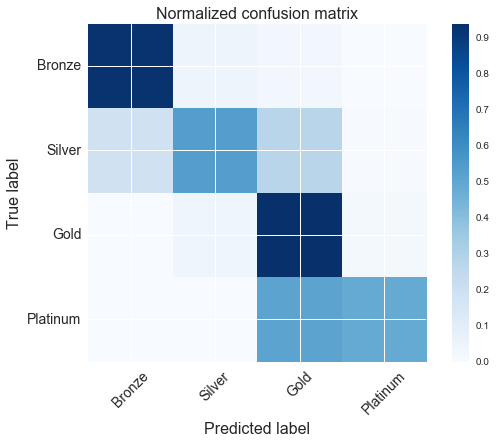

In [33]:
plt.figure(figsize=(8, 6))
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(conf_normalized, title='Normalized confusion matrix',labels=labels)

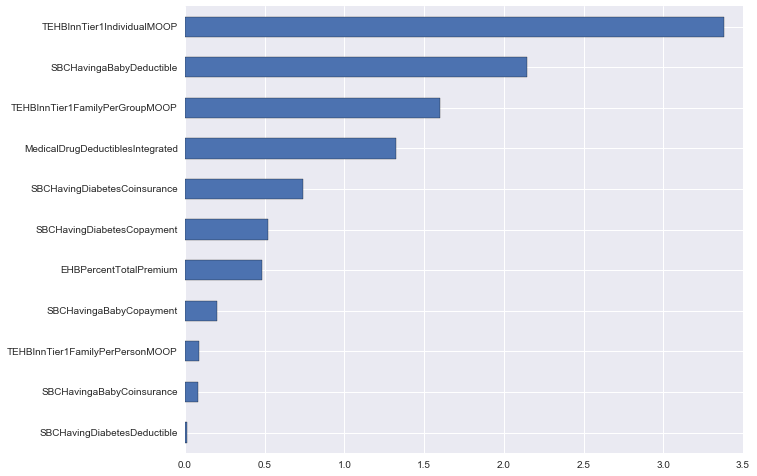

In [34]:
plt.figure(figsize=(10, 8))
#weights = pd.Series(svm_sgd.coef_[0],index=colX)
weights = pd.Series(abs(svm_sgd.coef_[0]),index=colX)
weights = weights.sort_values(ascending=True)
weights.plot(kind='barh')

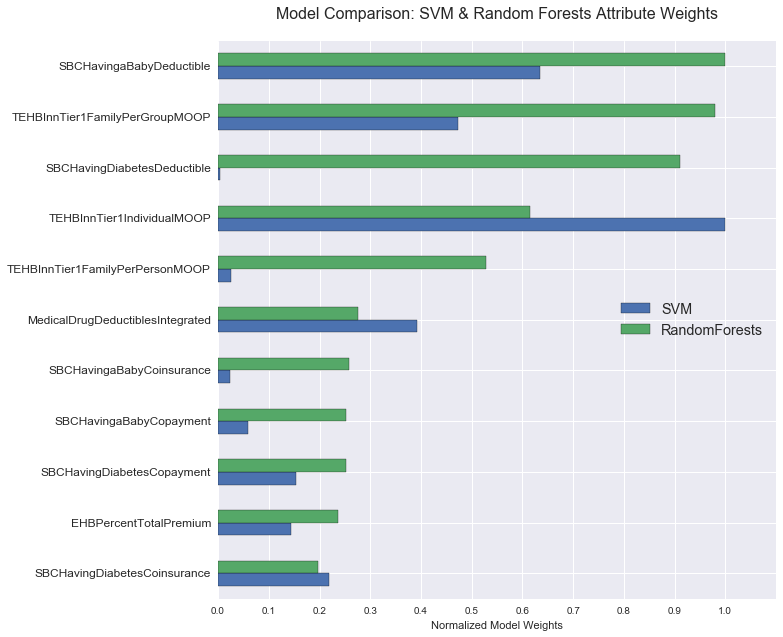

In [35]:
weightsSVM = pd.Series(abs(svm_sgd.coef_[0]),index=colX)
weightsRF = pd.Series(model.feature_importances_,index=colX)

inf = pd.concat([weightsSVM,weightsRF],axis=1)
inf = inf.rename(columns={0:'SVM',1:'RandomForests'})

inf['SVM'] = inf.SVM/inf.SVM.max()
inf['RandomForests'] = inf.RandomForests/inf.RandomForests.max()

inf.sort_values('RandomForests', ascending=True).plot(kind='barh',stacked=False,figsize=(10,10))
plt.xlim([0,1.1])
plt.xticks(np.arange(0, 1.05, .1))
plt.yticks(fontsize=12)
plt.title('Model Comparison: SVM & Random Forests Attribute Weights\n', fontsize = 16)
plt.xlabel('Normalized Model Weights')
plt.legend(loc='center right', fontsize = 'x-large')

# inf.sort_values('RandomForests', ascending=False).plot(kind='bar',stacked=False,figsize=(16,10))
# plt.ylim([0,1.05])

#Attributes to keep
attributesKeep = inf.loc[inf['RandomForests'] > 0.4,:].index.values

### Third Iteration

In [53]:
attributesKeep

array(['SBCHavingDiabetesDeductible', 'SBCHavingaBabyDeductible',
       'TEHBInnTier1IndividualMOOP', 'TEHBInnTier1FamilyPerGroupMOOP',
       'TEHBInnTier1FamilyPerPersonMOOP'], dtype=object)

In [54]:
colX = attributesKeep

In [55]:
X_train, X_test, y_train, y_test = train_test_split(df[colX], 
                                                    df['MetalLevel'], 
                                                    test_size=0.30,random_state=42)

In [56]:
model = RandomForestClassifier(class_weight='balanced')
model.fit(X_train,y_train)
predictions = model.predict(X_test)

conf = confusion_matrix(y_test,predictions,labels)
acc = accuracy_score(y_test,predictions)

print (conf)
print (acc)

[[ 92028   2630      0      0]
 [ 12089 180276   2987      0]
 [     0   1821 156788   6601]
 [     0      0    476  32852]]
0.945544757117


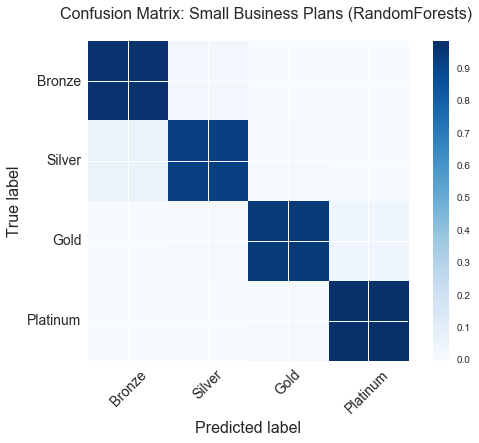

In [57]:
plt.figure(figsize=(8, 6))
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(conf_normalized, 
                      title='        Confusion Matrix: Small Business Plans (RandomForests)\n',
                      labels=labels)

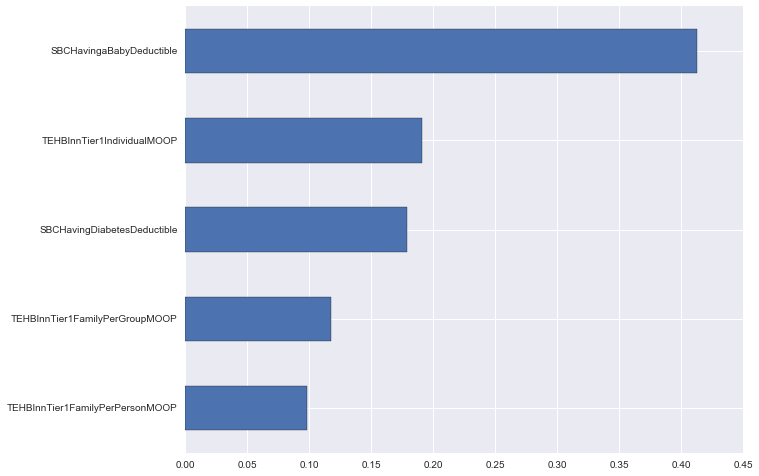

In [58]:
plt.figure(figsize=(10, 8))
weights = pd.Series(model.feature_importances_,index=colX)
weights = weights.sort_values(ascending=True)
weights.plot(kind='barh')

### Try with SVM again

In [59]:
scl_obj = StandardScaler()
scl_obj.fit(X_train)

X_train = scl_obj.transform(X_train)
X_test = scl_obj.transform(X_test)

svm_sgd = SGDClassifier(alpha=0.0001, loss='hinge', penalty='l2',class_weight='balanced')

svm_sgd.fit(X_train,y_train)
yhat = svm_sgd.predict(X_test)

conf = confusion_matrix(y_test,yhat,labels)
acc = accuracy_score(y_test,yhat)
print (conf)
print (acc)

[[ 70853  21299   2506      0]
 [ 58826  70559  65967      0]
 [    60   4191 160517    442]
 [     0      0  18206  15122]]
0.648965915325


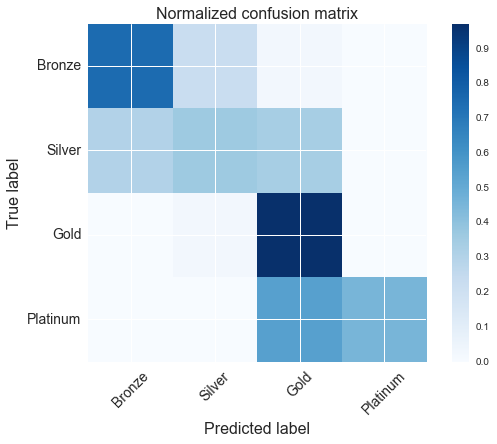

In [60]:
plt.figure(figsize=(8, 6))
conf_normalized = conf.astype('float') / conf.sum(axis=1)[:, np.newaxis]
plot_confusion_matrix(conf_normalized, title='Normalized confusion matrix',labels=labels)

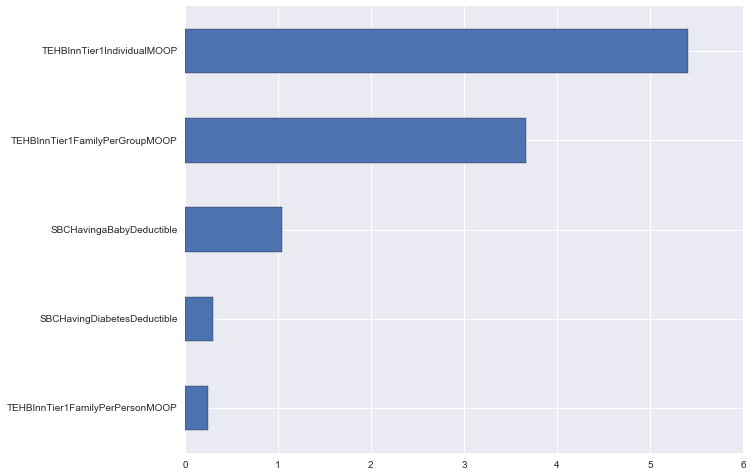

In [61]:
plt.figure(figsize=(10, 8))
#weights = pd.Series(svm_sgd.coef_[0],index=colX)
weights = pd.Series(abs(svm_sgd.coef_[0]),index=colX)
weights = weights.sort_values(ascending=True)
weights.plot(kind='barh')

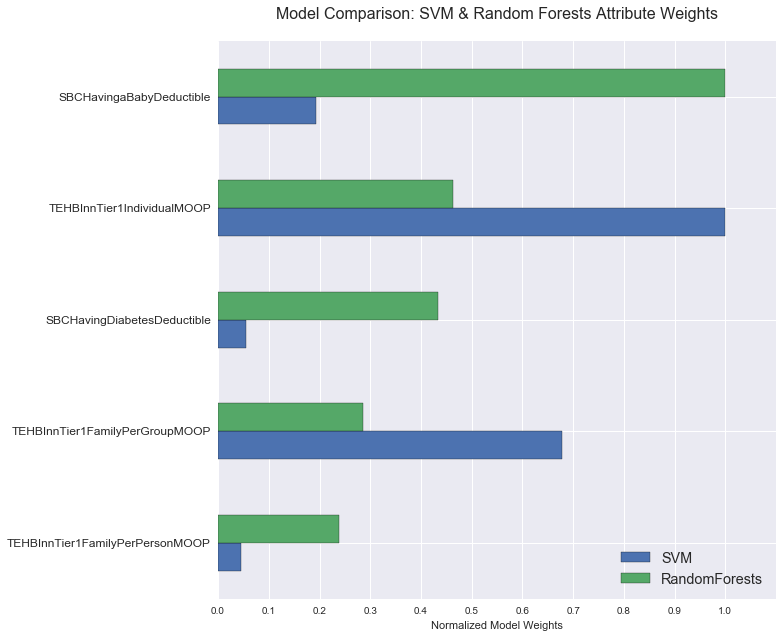

In [62]:
weightsSVM = pd.Series(abs(svm_sgd.coef_[0]),index=colX)
weightsRF = pd.Series(model.feature_importances_,index=colX)

inf = pd.concat([weightsSVM,weightsRF],axis=1)
inf = inf.rename(columns={0:'SVM',1:'RandomForests'})

inf['SVM'] = inf.SVM/inf.SVM.max()
inf['RandomForests'] = inf.RandomForests/inf.RandomForests.max()

inf.sort_values('RandomForests', ascending=True).plot(kind='barh',stacked=False,figsize=(10,10))
plt.xlim([0,1.1])
plt.xticks(np.arange(0, 1.05, .1))
plt.yticks(fontsize=12)
plt.title('Model Comparison: SVM & Random Forests Attribute Weights\n', fontsize = 16)
plt.xlabel('Normalized Model Weights')
plt.legend(loc='best', fontsize = 'x-large')

# inf.sort_values('RandomForests', ascending=False).plot(kind='bar',stacked=False,figsize=(16,10))
# plt.ylim([0,1.05])

#Attributes to keep
attributesKeep = inf.loc[inf['RandomForests'] > 0.2,:].index.values

### Let's Generate Some Plots

In [45]:
df['logIndividualRate'] = np.log10(df['IndividualRate']+1)
df['logTEHBDedInnTier1Individual'] = np.log10(df['TEHBDedInnTier1Individual']+1)
df['logTEHBInnTier1IndividualMOOP'] = np.log10(df['TEHBInnTier1IndividualMOOP']+1)
df['logTEHBInnTier1FamilyPerGroupMOOP'] = np.log10(df['TEHBInnTier1FamilyPerGroupMOOP']+1)
df['logSBCHavingaBabyDeductible'] = np.log10(df['SBCHavingaBabyDeductible']+1)

In [46]:
#col = 'logIndividualRate'
#col = 'TEHBDedInnTier1Individual'
col = 'TEHBInnTier1IndividualMOOP'
#col = 'logTEHBInnTier1FamilyPerGroupMOOP'
#col = 'SBCHavingaBabyDeductible'
#tmp1 = df.loc[df['MetalLevel'] == 'Catastrophic',[col]]
tmp2 = df.loc[df['MetalLevel'] == 'Bronze',[col]]
tmp3 = df.loc[df['MetalLevel'] == 'Silver',[col]].head(600000)
tmp4 = df.loc[df['MetalLevel'] == 'Gold',[col]]
tmp5 = df.loc[df['MetalLevel'] == 'Platinum',[col]]

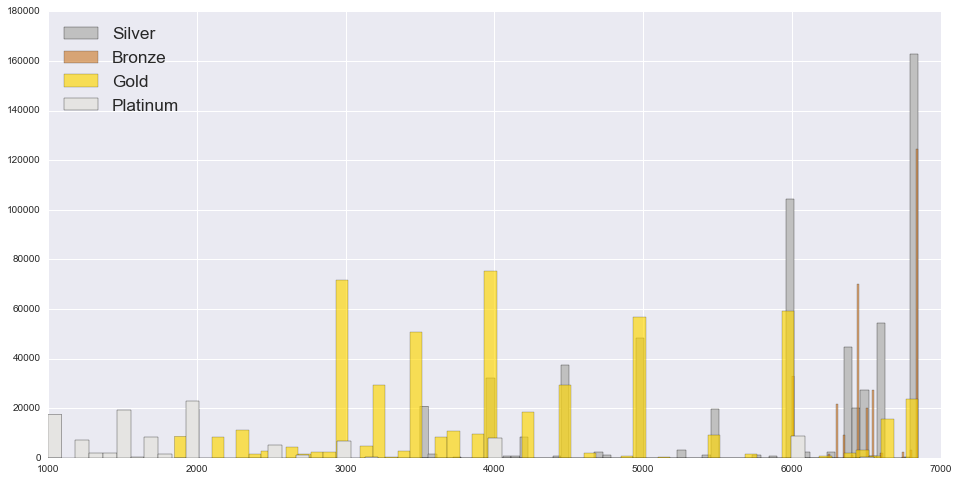

In [47]:
plt.figure(figsize=(16, 8))
plt.hist(tmp3[col],bins=60, label = 'Silver', color = '#c0c0c0')
plt.hist(tmp2[col],bins=60, alpha = .65,label = 'Bronze',color='#cd7f32')
plt.hist(tmp4[col],bins=60, alpha = .65,label = 'Gold',color='#ffd700')
plt.hist(tmp5[col],bins=60, label = 'Platinum', color='#e5e4e2')
#plt.hist(tmp1[col],bins=60, label = 'Catastrophic', color = '#ff0000')
#plt.xlim([0,1400])
plt.legend(loc='best',fontsize='xx-large')
plt.show()

### Testing Treeinterpreter package

In [48]:
## Let's get tree paths to build a model
from treeinterpreter import treeinterpreter as ti

In [49]:
instance = X_train[1000,:].reshape(1,-1)
print (model.predict_proba(instance))

[[ 0.  0.  1.  0.]]


In [50]:
y_train.iloc[1000]

'Bronze'

In [51]:
prediction, bias, contributions = ti.predict(model, instance)

X_train[1000,:]

array([ 2.57786398,  1.72609404,  0.76949003,  0.74501504,  0.75400469])

In [52]:
print ("Prediction", prediction)
print ("Bias (trainset prior)", bias)
print ("Feature contributions:")
print ("")
for c, feature in zip(contributions[0], colX):
    print ('{0!s:10} {1!s:10}'.format(c, feature))

Prediction [[ 0.  0.  1.  0.]]
Bias (trainset prior) [[ 0.25010097  0.25004665  0.24999764  0.24985474]]
Feature contributions:

[ 0.        -0.0193175  0.0193175  0.       ] SBCHavingDiabetesDeductible
[-0.12506358 -0.03193483  0.22877837 -0.07177996] SBCHavingaBabyDeductible
[-0.07508719 -0.04615307  0.19621382 -0.07497356] TEHBInnTier1IndividualMOOP
[ 0.         -0.05771956  0.07859613 -0.02087657] TEHBInnTier1FamilyPerGroupMOOP
[-0.0499502  -0.09492169  0.22709654 -0.08222465] TEHBInnTier1FamilyPerPersonMOOP
